In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import numpy as np
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [2]:
infect_A=pd.read_csv('infectDataset/city_A/infection.csv',header=None)
infect_A.columns = ['city','region_id','date', 'index']
infect_B=pd.read_csv('infectDataset/city_B/infection.csv',header=None)
infect_B.columns = ['city','region_id','date', 'index']
infect_C=pd.read_csv('infectDataset/city_C/infection.csv',header=None)
infect_C.columns = ['city','region_id','date', 'index']
infect_D=pd.read_csv('infectDataset/city_D/infection.csv',header=None)
infect_D.columns = ['city','region_id','date', 'index']
infect_E=pd.read_csv('infectDataset/city_E/infection.csv',header=None)
infect_E.columns = ['city','region_id','date', 'index']
infect_F=pd.read_csv('infectDataset/city_F/infection.csv',header=None)
infect_F.columns = ['city','region_id','date', 'index']
infect_G=pd.read_csv('infectDataset/city_G/infection.csv',header=None)
infect_G.columns = ['city','region_id','date', 'index']
infect_H=pd.read_csv('infectDataset/city_H/infection.csv',header=None)
infect_H.columns = ['city','region_id','date', 'index']
infect_I=pd.read_csv('infectDataset/city_I/infection.csv',header=None)
infect_I.columns = ['city','region_id','date', 'index']
infect_J=pd.read_csv('infectDataset/city_J/infection.csv',header=None)
infect_J.columns = ['city','region_id','date', 'index']
infect_K=pd.read_csv('infectDataset/city_K/infection.csv',header=None)
infect_K.columns = ['city','region_id','date', 'index']
#
#
infection_data={'A':infect_A,'B':infect_B,'C':infect_C,'D':infect_D,'E':infect_E,'F':infect_F,'G':infect_G,'H':infect_H,'I':infect_I,'J':infect_J,'K':infect_K}
#按照date进行groupby,total_A就表示了city_A 45天每天的新增人数
grouped=infect_A.groupby(['date'])
total_A=grouped['index'].agg(np.sum).reset_index(drop=True)#45天每天新增人数
#acc_A=[np.sum(total_A[:i]) for i in range(1,len(total_A)+1)]#45天每天累计感染人数
grouped=infect_B.groupby(['date'])
total_B=grouped['index'].agg(np.sum).reset_index(drop=True)
#acc_B=[np.sum(total_B[:i]) for i in range(1,len(total_B)+1)]
grouped=infect_C.groupby(['date'])
total_C=grouped['index'].agg(np.sum).reset_index(drop=True)
#acc_C=[np.sum(total_C[:i]) for i in range(1,len(total_C)+1)]
grouped=infect_D.groupby(['date'])
total_D=grouped['index'].agg(np.sum).reset_index(drop=True)
#acc_D=[np.sum(total_D[:i]) for i in range(1,len(total_D)+1)]
grouped=infect_E.groupby(['date'])
total_E=grouped['index'].agg(np.sum).reset_index(drop=True)
#acc_E=[np.sum(total_E[:i]) for i in range(1,len(total_E)+1)]
grouped=infect_F.groupby(['date'])
total_F=grouped['index'].agg(np.sum).reset_index(drop=True)#45天每天新增人数
#acc_F=[np.sum(total_F[:i]) for i in range(1,len(total_F)+1)]#45天每天累计感染人数
grouped=infect_G.groupby(['date'])
total_G=grouped['index'].agg(np.sum).reset_index(drop=True)
#acc_G=[np.sum(total_G[:i]) for i in range(1,len(total_G)+1)]
grouped=infect_H.groupby(['date'])
total_H=grouped['index'].agg(np.sum).reset_index(drop=True)
#acc_H=[np.sum(total_H[:i]) for i in range(1,len(total_H)+1)]
grouped=infect_I.groupby(['date'])
total_I=grouped['index'].agg(np.sum).reset_index(drop=True)
#acc_I=[np.sum(total_I[:i]) for i in range(1,len(total_I)+1)]
grouped=infect_J.groupby(['date'])
total_J=grouped['index'].agg(np.sum).reset_index(drop=True)
#acc_J=[np.sum(total_J[:i]) for i in range(1,len(total_J)+1)]
grouped=infect_K.groupby(['date'])
total_K=grouped['index'].agg(np.sum).reset_index(drop=True)
#acc_K=[np.sum(total_K[:i]) for i in range(1,len(total_K)+1)]
city_infect={'A':total_A,'B':total_B,'C':total_C,'D':total_D,'E':total_E,'F':total_F,'G':total_G,'H':total_H,'I':total_I,'J':total_J,'K':total_K}
#acc_infect={'A':acc_A,'B':acc_B,'C':acc_C,'D':acc_D,'E':acc_E,'F':acc_F,'G':acc_G,'H':acc_H,'I':acc_I,'J':acc_J,'K':acc_K}

In [3]:
#这段代码
'''
re_sub=pd.read_csv('submits/submissionShilft1_16.csv',header=None)
re_sub.columns = ['city','region_id','date', 'index']
pre_city_id={}
pre_id={}
pre_best={}
def get_true(city,Id):
    infection=infection_data[city]
    id_infect=infection[infection['region_id'].isin([Id])].reset_index(drop=True)
    return id_infect['index'].values
grouped=re_sub.groupby(['city'])
for city,group in grouped:
    data=group.reset_index(drop=True)
    grouped1=data.groupby(['date'])
    pre_city=grouped1['index'].agg(np.sum).reset_index(drop=True)#30天每天新增人数
    pre_best[city]=pre_city
'''


#for key in city_infect.keys():
#    city_infect[key]=pd.concat((city_infect[key],pre_best[key]),axis=0).reset_index(drop=True)




"\nre_sub=pd.read_csv('submits/submissionShilft1_16.csv',header=None)\nre_sub.columns = ['city','region_id','date', 'index']\npre_city_id={}\npre_id={}\npre_best={}\ndef get_true(city,Id):\n    infection=infection_data[city]\n    id_infect=infection[infection['region_id'].isin([Id])].reset_index(drop=True)\n    return id_infect['index'].values\ngrouped=re_sub.groupby(['city'])\nfor city,group in grouped:\n    data=group.reset_index(drop=True)\n    grouped1=data.groupby(['date'])\n    pre_city=grouped1['index'].agg(np.sum).reset_index(drop=True)#30天每天新增人数\n    pre_best[city]=pre_city\n"

# SEIR模型

city_A的最佳拟合参数
1.0 559183.6734693877 10.0


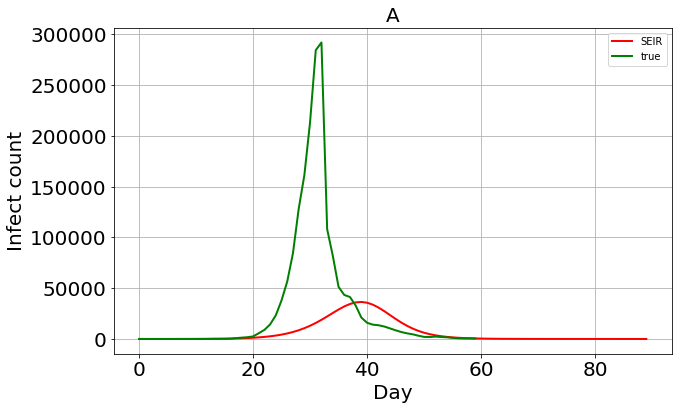

city_B的最佳拟合参数
1.0 224489.79591836737 0.1


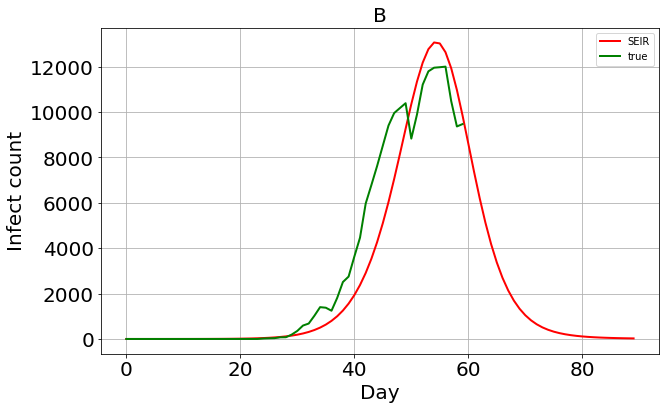

city_C的最佳拟合参数
0.9052631578947369 1674489.7959183673 2.3000000000000003


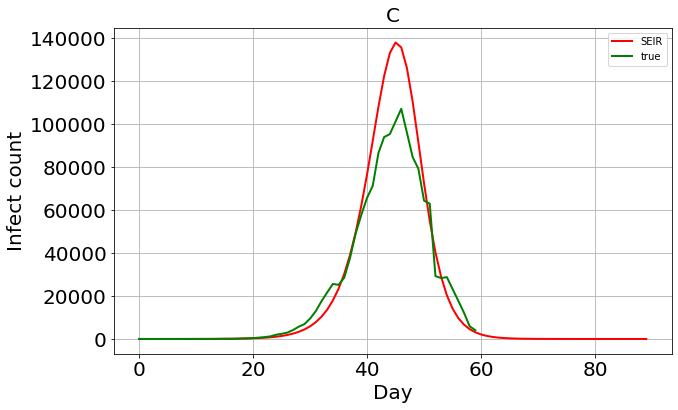

city_D的最佳拟合参数
1.0 345918.36734693876 0.1


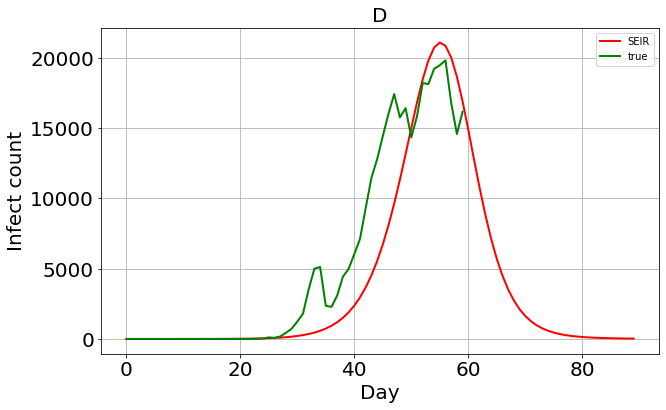

city_E的最佳拟合参数
0.8105263157894737 92857.14285714286 0.1


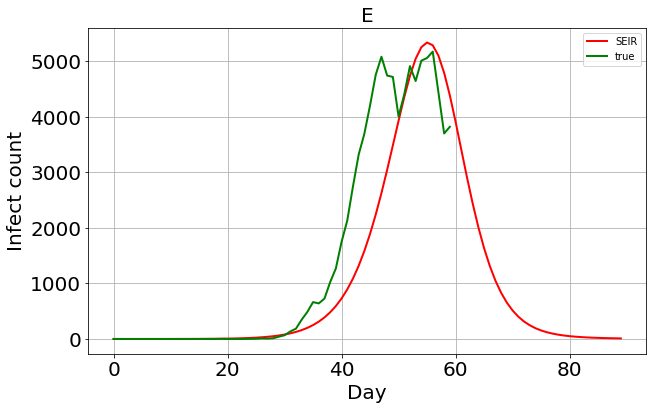

city_F的最佳拟合参数
1.0 3105102.0408163266 1.2000000000000002


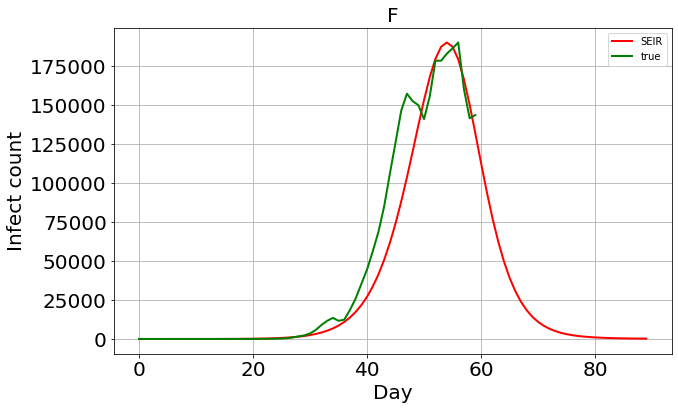

city_G的最佳拟合参数
1.0 185714.2857142857 0.1


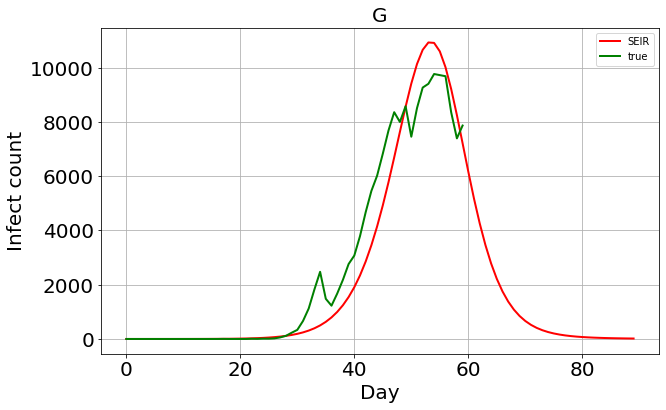

city_H的最佳拟合参数
0.6684210526315789 340816.32653061225 3.4000000000000004


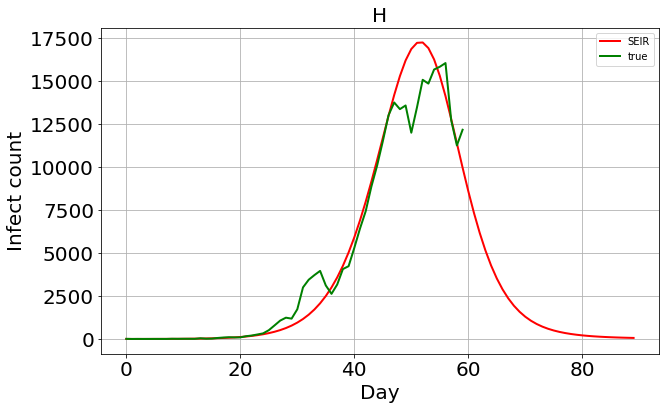

city_I的最佳拟合参数
0.9526315789473684 121428.57142857143 0.1


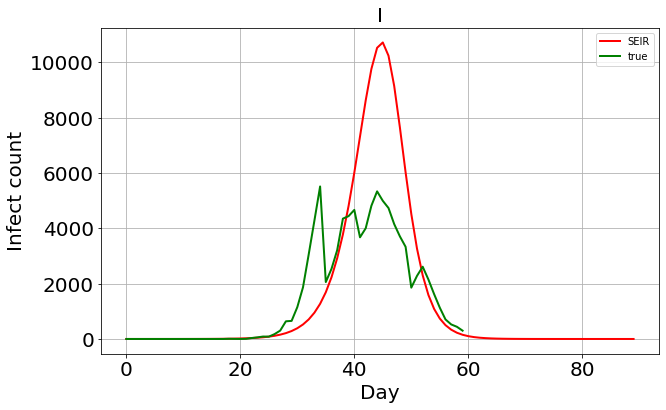

city_J的最佳拟合参数
0.9526315789473684 50000.0 0.1


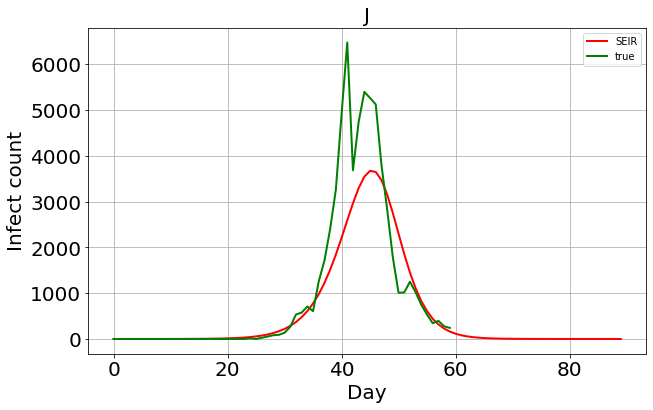

city_K的最佳拟合参数
0.9526315789473684 257142.85714285713 0.1


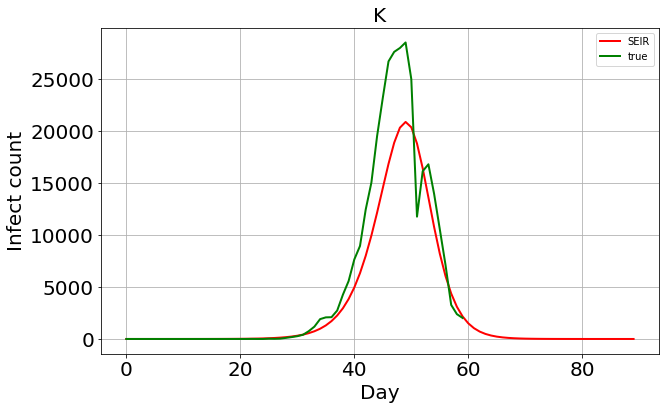

0.6980248207949874

In [16]:
def adj_lamda(lamda_init,t,decay_rate):
    # 衰减系数
    #decay_rate= 0.02+decay_rate
    decay_steps = 4
    # 迭代轮数
    global_steps = 90
    # 指数感染率衰减过程
    decayed_lamda = lamda_init * decay_rate**(t / decay_steps)
    return decayed_lamda
#定义误差
def RMSE(data1,data2):
    return np.sqrt(np.mean((data1-data2)**2))
def RMSLE(data1,data2):
    return np.sqrt(np.mean((np.log1p(data1)-np.log1p(data2))**2))
#找到第一次出现病例的那天
def find_zero(data):
    for i in range(len(data)):
        if data[i]>0:
            return i
#寻找参数
def get_param(x,city):
    x=x[find_zero(x):]
    # 对城市总人口的估计
    N_dic ={'A':5e6,'B':0.2e6,'C':2e6,'D':0.3e6,'E':0.15e6,
            'F':5e6,'G':0.2e6,'H':0.2e6,'I':0.15e6,'J':0.15e6,'K':0.3e6}
    lamda_list=np.linspace(0.1,1,20) #lamda 50个候选值
    init_list=np.linspace(0.1,10,10) #初始感染人数,3个值
    N_init=N_dic[city]  #先估计一下各个区人口总数
    N_list=np.linspace(50000,N_init*5,50)#人口总数给100个值
    #总共需要搜索的次数(50*3*100)
    best_param={}
    loss=1e5
    #decay_rate_city={'A':0.935,'B':0.93,'C':0.955,'D':0.93,'E':0.93,
            #'F':0.925,'G':0.93,'H':0.93,'I':0.975,'J':0.955,'K':0.97}#1.44
    #decay_rate_city={'A':0.935,'B':0.96,'C':0.955,'D':0.96,'E':0.96,
            #'F':0.95,'G':0.96,'H':0.97,'I':0.98,'J':0.96,'K':0.98}#1.33
    #decay_rate_city={'A':0.93,'B':0.96,'C':0.98,'D':0.96,'E':0.96,
            #'F':0.96,'G':0.95,'H':0.95,'I':0.985,'J':0.96,'K':0.975}#1.28
    decay_rate_city={'A':0.93,'B':0.94,'C':0.98,'D':0.945,'E':0.955,
            'F':0.944,'G':0.94,'H':0.955,'I':0.985,'J':0.96,'K':0.975}#1.04
    for lamda_init in lamda_list:
        for init_person in init_list:
            for N in N_list:
                gamma = 0.05 # recover rate
                sigma = 1 / 3# exposed period
                T=90
                s = np.zeros([T])
                e = np.zeros([T])
                i = np.zeros([T])
                r = np.zeros([T])
                add=np.zeros([T])
                i[0] = init_person/N #初始感染人数估计
                add[0]=i[0]#
                s[0] = 1
                e[0] = init_person/N #初始潜伏期人数估计
                for t in range(T-1):
                    lamda=adj_lamda(lamda_init,t,decay_rate_city[city])
                    s[t + 1] = s[t] - lamda * s[t] * i[t]
                    e[t + 1] = e[t] + lamda * s[t] * i[t] - sigma * e[t]
                    i[t + 1] = i[t] + sigma * e[t] - gamma * i[t]
                    add[t+1] = sigma * e[t]
                    r[t + 1] = r[t] + gamma * i[t]
                tmp=RMSLE(add[60-len(x):60]*N,x)
                if tmp<loss:
                    loss=tmp
                    best_param['lamda']=lamda_init
                    best_param['N']=N
                    best_param['init']=init_person
                    best_param['value']=add*N
                    
    return best_param

#
def search_param():
    pre_dic={}
    for city in ['A','B','C','D','E','F','G','H','I','J','K']:
        infection=city_infect[city]
        y=infection.values
        #10471, 7622, 95405, 12777, 3695
        re=get_param(y,city)
        pre_dic[city]=re['value'][60:]
        print("city_%s的最佳拟合参数"%city)
        print(re['lamda'],re['N'],re['init'])
        #画图检验搜索出来参数的真实拟合效果
        fig, ax = plt.subplots(figsize=(10,6))
        ax.plot(re['value'], c='r', lw=2, label='SEIR')
        ax.plot(y, c='g', lw=2, label='true')
        ax.set_xlabel('Day',fontsize=20)
        ax.set_ylabel('Infect count', fontsize=20)
        ax.grid(1)
        plt.title(city,fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend();
        save_dir='SEIR_fit/'
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        #plt.savefig(os.path.join(save_dir,city+'.png'))
        plt.show()
        plt.close()
    return pre_dic
#开始搜索参数
pre_dicSeir=search_param()
#
#为每个区域分配新增人数，生成提交的csv文件
import random
import os
#以最后一天为基准,求一个比例，给各个区域分配预测值
def get_ratio(infection):
    grouped=infection.groupby(['date'])
    last_df=grouped.get_group(21200629).reset_index(drop=True)
    ratio=last_df['index']/last_df['index'].sum()
    return ratio.values
ratios={}
for city in ['A','B','C','D','E','F','G','H','I','J','K']:
    ratios[city]=get_ratio(infection_data[city])
#写结果
pre_dic=pre_dicSeir#Seir的预测结果
submit=pd.read_csv('submits/submission.csv',header=None)
submit.columns = ['city','region_id','date', 'index']
#
submit=submit.drop(['index'],axis=1)
pres=[]
def convert_date(date):
    if date==21200630:
        return 0
    else:
        return date-21200700
def get_result(city,region_id,date):
    tmp=random.choice([0,0,2,2,1,2,2,1,2,0,0,1,0,2,0,2,2,1])
    if city=='A':
        pre=pre_dic['A'][convert_date(date)]*ratios['A'][region_id]+tmp
    if city=='B':
        pre=pre_dic['B'][convert_date(date)]*ratios['B'][region_id]+tmp
    if city=='C':
        pre=pre_dic['C'][convert_date(date)]*ratios['C'][region_id]+tmp
    if city=='D':
        pre=pre_dic['D'][convert_date(date)]*ratios['D'][region_id]+tmp
    if city=='E':
        pre=pre_dic['E'][convert_date(date)]*ratios['E'][region_id]+tmp
    if city=='F':
        pre=pre_dic['F'][convert_date(date)]*ratios['F'][region_id]+tmp
    if city=='G':
        pre=pre_dic['G'][convert_date(date)]*ratios['G'][region_id]+tmp
    if city=='H':
        pre=pre_dic['H'][convert_date(date)]*ratios['H'][region_id]+tmp
    if city=='I':
        pre=pre_dic['I'][convert_date(date)]*ratios['I'][region_id]+tmp
    if city=='J':
        pre=pre_dic['J'][convert_date(date)]*ratios['J'][region_id]+tmp
    if city=='K':
        pre=pre_dic['K'][convert_date(date)]*ratios['K'][region_id]+tmp
    return pre
#
for _,city,region_id,date in submit.itertuples():
    pre=get_result(city,region_id,date)
    if pre<0:
        pre=0
    pres.append(int(pre))

submit['index']=pres
submit_dir='submits/'
if not os.path.exists(submit_dir):
    os.makedirs(submit_dir)
submit.to_csv(os.path.join(submit_dir,'submission7_31v1.csv'),index=False,header=False)
#
def RMSLE(data1,data2):
    return np.sqrt(np.mean((np.log1p(data1)-np.log1p(data2))**2))
re_sub1=pd.read_csv('submits/submissionShilft1_16.csv',header=None)
re_sub1.columns = ['city','region_id','date', 'index']
re_sub2=pd.read_csv('submits/submission7_31v1.csv',header=None)
re_sub2.columns = ['city','region_id','date', 'index']
RMSLE(re_sub1['index'],re_sub2['index'])